Importing libray

In [3]:
!pip install kaggle


In [2]:
import numpy as np
import cv2
#import imutils
import csv
import argparse
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [15]:
!cd


sample_data


In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [17]:
!chmod 600 ~/.kaggle/kaggle.json


In [19]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:05<00:00, 231MB/s]
100% 1.03G/1.03G [00:05<00:00, 197MB/s]


In [27]:
import zipfile

zip_path = "asl-alphabet.zip"
extract_path = "data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [58]:
data_Train_Path = "~/content/data/asl_alphabet_train/asl_alphabet_train"

output = open(indexPath, "w")

for imagePath in glob.glob(data_Train_Path + "/*/*.jpg"):
    print(imagePath)
    imageID = imagePath[imagePath.rfind("\\") + 1:]
    target = imagePath[imagePath.rfind("train")+6 :imagePath.rfind("train")+7]
    image = cv2.imread(imagePath)
    features = describe(image)
    features = [str(f) for f in features]
    print(f"{imageID}")
    output.write("%s,%s\n" % (imageID+","+target, ",".join(features)))
output.close()

In [57]:
!ls

asl-alphabet.zip  data	index001.csv  sample_data


In [34]:
data = pd.read_csv('index001.csv', header=None)
col_list =['name','target'] + ['s' + str(x) for x in range(0,1440)]
data.columns = col_list
y = data.target
data = data.drop('name',1)
X_train = data.drop('target',1)
del data

## transform categorical target to numbers (encoding the target columns)
y[y=='A']=1
y[y=='B']=2
y[y=='C']=3
y[y=='D']=4
y[y=='d']=5
y[y=='E']=6
y[y=='F']=7
y[y=='G']=8
y[y=='H']=9
y[y=='I']=10
y[y=='J']=11
y[y=='K']=12
y[y=='L']=13
y[y=='M']=14
y[y=='N']=15
y[y=='n']=16
y[y=='O']=17
y[y=='P']=18
y[y=='Q']=19
y[y=='R']=20
y[y=='S']=21
y[y=='s']=22
y[y=='T']=23
y[y=='U']=24
y[y=='V']=25
y[y=='W']=26
y[y=='X']=27
y[y=='Y']=28
y[y=='Z']=29


y=y.astype('int')
y.unique()

EmptyDataError: ignored

In [44]:
import csv

with open('index001.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

NEW-try

In [59]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [68]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label_folder = os.path.join(folder, filename)
        if filename in ["space", "del", "nothing"]:
            continue
        print(label_folder)
        if os.path.isdir(label_folder):
            for image_file in os.listdir(label_folder):
                img = Image.open(os.path.join(label_folder, image_file))
                if img is not None:
                    # Resize and flatten the image to make it suitable for logistic regression.
                    img = img.resize((64, 64))
                    img_arr = np.array(img).flatten()
                    images.append(img_arr)
                    labels.append(filename)
    return images, labels


In [71]:
images, labels = load_images_from_folder('data/asl_alphabet_train/asl_alphabet_train')


data/asl_alphabet_train/asl_alphabet_train/A
data/asl_alphabet_train/asl_alphabet_train/M
data/asl_alphabet_train/asl_alphabet_train/E
data/asl_alphabet_train/asl_alphabet_train/I
data/asl_alphabet_train/asl_alphabet_train/O
data/asl_alphabet_train/asl_alphabet_train/J
data/asl_alphabet_train/asl_alphabet_train/X
data/asl_alphabet_train/asl_alphabet_train/L
data/asl_alphabet_train/asl_alphabet_train/P
data/asl_alphabet_train/asl_alphabet_train/V
data/asl_alphabet_train/asl_alphabet_train/K
data/asl_alphabet_train/asl_alphabet_train/Y
data/asl_alphabet_train/asl_alphabet_train/G
data/asl_alphabet_train/asl_alphabet_train/N
data/asl_alphabet_train/asl_alphabet_train/Q
data/asl_alphabet_train/asl_alphabet_train/B
data/asl_alphabet_train/asl_alphabet_train/D
data/asl_alphabet_train/asl_alphabet_train/W
data/asl_alphabet_train/asl_alphabet_train/R
data/asl_alphabet_train/asl_alphabet_train/H
data/asl_alphabet_train/asl_alphabet_train/S
data/asl_alphabet_train/asl_alphabet_train/Z
data/asl_a

In [72]:
# Encode labels to numerical values
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)


In [73]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)


In [74]:
# Create and train a logistic regression model
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [75]:
predictions = logisticRegr.predict(test_images)

# Output accuracy
print("Accuracy: ", accuracy_score(test_labels, predictions))
# Output confusion matrix
print("Confusion Matrix: ", confusion_matrix(test_labels, predictions))

Accuracy:  0.9085470085470085
Confusion Matrix:  [[790  37   9  22  17   1   1   0   1   0   0   1   3   0  11   0   0   0
    0   0   1   0   0   2   0   2]
 [ 42 799   8  12  14  14   0   0   1   0   0   2   0   0   2   0   0   0
    0   0   0   0   2   0   1   0]
 [  6   8 778  47   8   1   0   0   0   0   0   0   3   0  10   0   1   0
    0   4   0   0   1   2   6   1]
 [ 19  11  26 794  23   3   0   0   1   0   0   1   1   0   1   0   0   0
    0   0   0   0   1   0   0   0]
 [ 12  25  11  31 794  29   9   0   1   3   1   3   1   0   1   0   0   0
    0   2   2   0   2   1   0   1]
 [  6  13   3  12  30 842   7   1   7   0   0   0   2   0   0   1   0   0
    3   2   1   2   2   0   2   0]
 [  0   0   2   0   0   2 852  46   3   6   3   0   1   1   0   1   0   1
    0   0   0   7   0   2   1   0]
 [  0   0   0   0   0   3  40 811   8  15  11   0   0   4   0   6  13   2
    2   1   0   2   0   1   0   0]
 [  0   0   1   2   0   0   2   0 838   5  11   3   2   0   2   0   0   2
    2

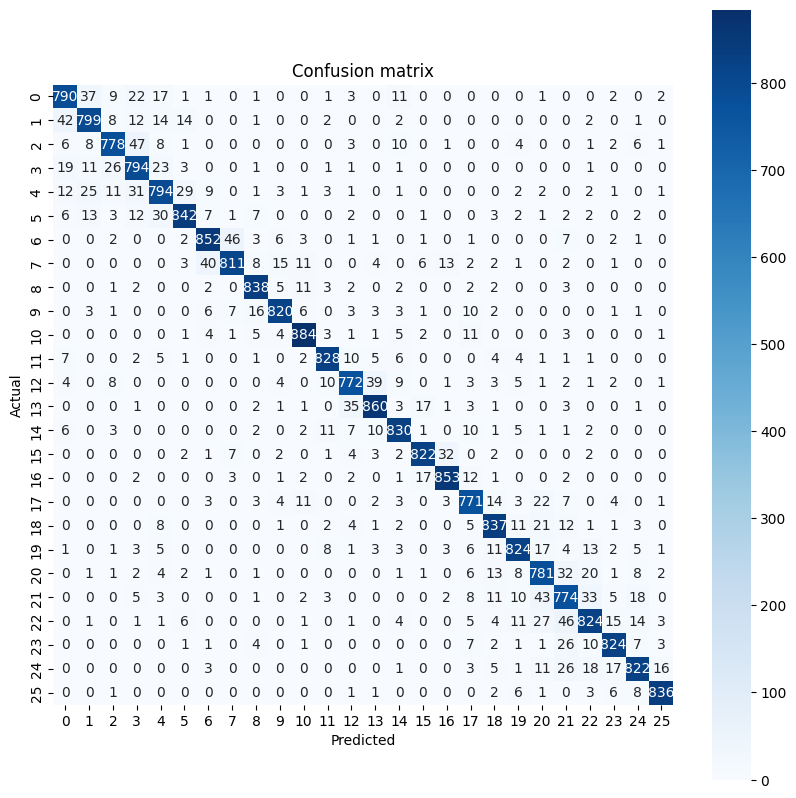

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()